Номер	1	2	3	4	5	6	7	8	9	10
Границы	[-3, -2.4]	[-2.4, -1.8]	[-1.8, -1.2]	[-1.2, -0.6]	[-0.6, 0.0]	[0.0, 0.6]	[0.6, 1.2]	[1.2, 1.8]	[1.8, 2.4]	[2.4, 3.0]
Середины	-2.7	-2.1	-1.5	-0.9	-0.3	0.3	0.9	1.5	2.1	2.7
Попадания	1	3	6	15	22	20	20	8	2	3
Частота	0.01	0.03	0.06	0.15	0.22	0.2	0.2	0.08	0.02	0.03


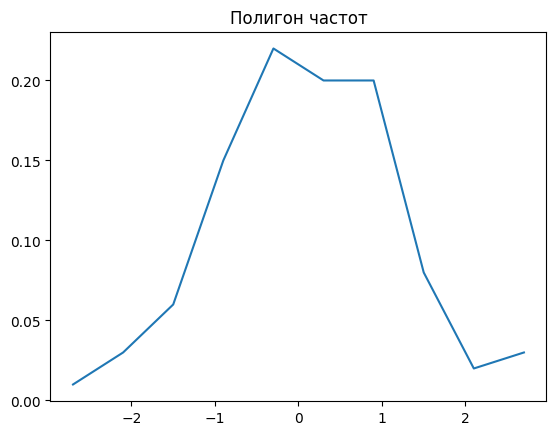

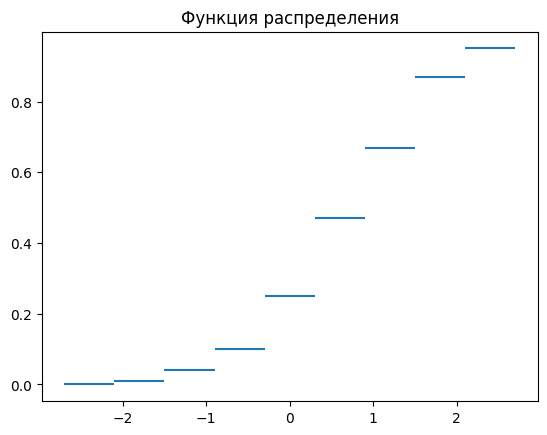

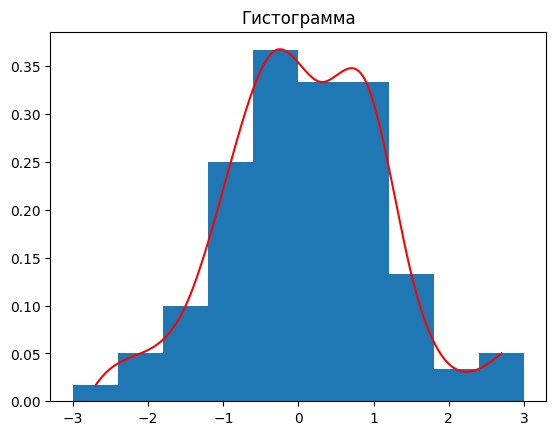


Поиск точечных оценок для МО и дисперсии:
xi*pi:      	-0.027000000000000003	-0.063	-0.09	-0.135	-0.066	0.06	0.18000000000000002	0.12	0.042	0.081
x^2i*pi:     	0.0729	0.1323	0.135	0.1215	0.019799999999999998	0.018	0.16200000000000003	0.18	0.0882	0.21870000000000003
Точечная оценка МО:          0.10200000000000001
Точечная оценка дисперсии:   1.137996

Доверительные интервалы:
Доверительный интервал для МО:  [ -0.09321871847750665 ; 0.2972187184775067 ]
Доверительный интервал для дисперсии:  [ 0.5390507368421052 ; 3.7933199999999996 ]

Проверка гипотезы о виде закона распределения (H0 - нормальное распределение)
Количество степеней свободы:  4
Хи квадрат наблюдаемое:  1.2724268563788323
Хи квадрат табличное:  9.5
Гипотеза H0 подтверждена


In [2]:
import math

import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from scipy.stats import norm


def empirical_func(k):
    frequency_count = 0
    for j in range(intervals_count):
        if not (intervals[j][0] < k <= intervals[j][1]):
            frequency_count += freqs[j]
        else:
            break
    return frequency_count


data = [-1.006, 0.386, -1.223, -0.591, -0.345, 0.157, 0.800, -0.155, -0.379, -1.023,
        1.306, -0.861, 0.303, 0.518, 0.986, 0.788, 0.883, -0.098, -0.242, 1.701,
        1.199, -1.230, -0.730, -1.492, 0.643, -0.577, -0.224, 0.997, -1.165, -0.494,
        -2.577, 2.641, -1.143, -0.086, 2.919, 0.527, 0.297, 0.434, 0.756, 0.172,
        -2.086, -0.904, -1.413, -0.012, -1.248, 1.671, -0.521, -0.025, 1.164, 0.354,
        0.866, -0.005, 0.403, 1.908, 0.448, 0.169, -0.731, -1.189, 0.905, 0.283,
        2.431, 1.409, 0.191, -0.165, 0.889, 0.804, -2.131, -0.754, 1.458, 1.650,
        0.026, 0.885, 0.011, -0.990, -0.104, 0.174, -0.052, -0.182, 1.813, 0.346,
        0.110, 1.757, -0.693, -0.732, 1.073, -1.724, -1.810, 0.947, -1.118, 0.666,
        0.970, 1.140, -1.105, 0.894, 1.547, -0.484, -0.086, -0.066, 0.150, -0.264]

n = len(data)
sorted_data = sorted(data)
intervals_count = int(n ** 0.5)
intervals = []
bottom, top = -3, 3
interval_length = (top - bottom) / intervals_count

print('Номер', end='\t')
print(*[i for i in range(1, intervals_count + 1)], sep='\t')

interval_bounds = [-2.5]

for i in range(intervals_count):
    top = round(bottom + interval_length, 5)
    interval_bounds.append(top)
    intervals.append([bottom, top])
    bottom = top

print('Границы', end='\t')
print(*intervals, sep='\t')

mid_points = [round(i[0] + i[1], 5) / 2 for i in intervals]
print('Середины', end='\t')
print(*mid_points, sep='\t')

m = []
for interval in intervals:
    count = sum(1 for x in data if interval[0] <= x < interval[1])
    m.append(count)

print('Попадания', end='\t')
print(*m, sep='\t')

freqs = [x / n for x in m]
print('Частота', end='\t')
print(*freqs, sep='\t')

plt.plot(mid_points, freqs)
plt.title('Полигон частот')
plt.show()

empirical_values = [empirical_func(x) for x in mid_points]
for i in range(len(mid_points) - 1):
    plt.hlines(empirical_values[i], mid_points[i], mid_points[i + 1])
plt.title('Функция распределения')
plt.show()

h = [x / interval_length for x in freqs]
xnew = np.linspace(min(mid_points), max(mid_points), 300)
spl = make_interp_spline(mid_points, h, k=3)
smooth = spl(xnew)
plt.bar(mid_points, h, interval_length)
plt.plot(xnew, smooth, color='red')

plt.title('Гистограмма')
plt.show()

print("\nПоиск точечных оценок для МО и дисперсии:")

# arrayXP - масcив x*ip*i
# arrayX2P - масcив x*2ip*i
# mid_points - массив середин интервалов
# freqs - массив частот
s2 = 0  # - дисперсия - d = sum(xi*xi*pi) - m^2
xLine = 0  # - матожидание - m = sum(xi*pi)
arrayXP = []
arrayX2P = []
for i in range(len(m)):
    arrayXP.append(mid_points[i] * freqs[i])
    arrayX2P.append(mid_points[i] * mid_points[i] * freqs[i])
    xLine += mid_points[i] * freqs[i]
    s2 += mid_points[i] * mid_points[i] * freqs[i]
s2 -= xLine * xLine

print('xi*pi:      ', end='\t')
print(*arrayXP, sep='\t')
print('x^2i*pi:     ', end='\t')
print(*arrayX2P, sep='\t')

print("Точечная оценка МО:         ", xLine)
print("Точечная оценка дисперсии:  ", s2)

print("\nДоверительные интервалы:")

# t - величина из таблицы Ф(t)
# o - СКО
t = 1.83
o = s2 ** 0.5
print("Доверительный интервал для МО:  [", xLine - t * o / math.sqrt(len(data)), ";",
      xLine + t * o / math.sqrt(len(data)), "]")
print("Доверительный интервал для дисперсии:  [", (len(mid_points) - 1) * s2 / 19, ";", (len(mid_points) - 1) * s2 / 2.7, "]")

print("\nПроверка гипотезы о виде закона распределения (H0 - нормальное распределение)")
mean = xLine
std = np.std(data, ddof=1)

# Разбиваем данные на равные интервалы
num_intervals = int(np.sqrt(len(data)))

# Считаем наблюдаемые частоты
observed_frequencies = np.histogram(data, bins=interval_bounds)[0]

# Вычисляем ожидаемые частоты
expected_frequencies = []
for i in range(num_intervals):
    low = interval_bounds[i]
    high = interval_bounds[i + 1]
    expected_freq = len(data) * (norm.cdf(high, mean, std) - norm.cdf(low, mean, std))
    expected_frequencies.append(expected_freq)

# Объединяем интервалы, если ожидаемая частота меньше 5
combined_observed = []
combined_expected = []
i = 0
while i < len(expected_frequencies):
    current_observed = observed_frequencies[i]
    current_expected = expected_frequencies[i]

    while i < len(expected_frequencies) - 1 and current_expected < 5:
        i += 1
        current_expected += expected_frequencies[i]
        current_observed += observed_frequencies[i]

    combined_observed.append(current_observed)
    combined_expected.append(current_expected)
    i += 1

# Проверяем последний интервал
if combined_expected[-1] < 5:
    # Если последний интервал имеет ожидаемую частоту меньше 5, объединяем его с предыдущим
    combined_expected[-2] += combined_expected[-1]
    combined_observed[-2] += combined_observed[-1]
    combined_expected.pop()
    combined_observed.pop()

# Обновляем количество интервалов после объединения
num_intervals = len(combined_observed)

# Вычисляем значение критерия хи-квадрат
chi_squared_stat = sum((np.array(combined_observed) - np.array(combined_expected)) ** 2 / np.array(combined_expected)) # sum ((ni-npi)^2 / npi)
degrees_of_freedom = num_intervals - 3

chi_squared_table = 9.5

print("Количество степеней свободы: ", degrees_of_freedom)
print("Хи квадрат наблюдаемое: ", chi_squared_stat)
print("Хи квадрат табличное: ", chi_squared_table)

print("Гипотеза H0 подтверждена" if chi_squared_stat < chi_squared_table else "Гипотеза H0 опровергнута, надо проверять другую")
